# Maths4DS 101
# Lab 2. Data and Sampling Distributions




### Describe objectives of the lab


### Reference to chapter 2 of the book

### Please refer to the reference book, chapter 2

[Book Chapter 2](https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/ch02.html)

### for Q&A please refer to the tags #maths4ds101 and #lab2 on stackoverflow

    
[StackOverflow](https://stackoverflow.com/c/cyberblue/questions/tagged/9)

# 0. Let's Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt
import math


In [2]:
DATA='../data/'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [3]:
LOANS_INCOME_CSV = DATA + 'loans_income.csv'
SP500_DATA_CSV = DATA + 'sp500_data.csv.gz'

Figure 2.1

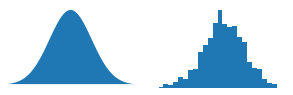

In [4]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

# 1. Sampling Distribution of a Statistic

In [5]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


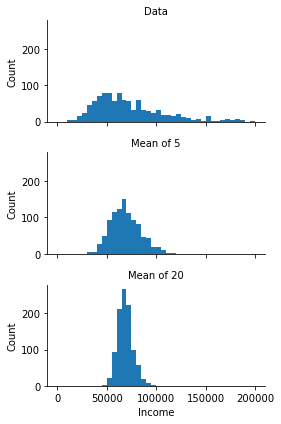

In [6]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# 2. The Bootstrap

In [7]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)


In [8]:
print('Bootstrap Statistics:')
print(f'original median: {loans_income.median()}')
print(f'bootstrapped median: {results.mean()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original median: 62000.0
bootstrapped median: 61917.902
bias: -82.09799999999814
std. error: 228.73933106830927


# 3. Confidence Intervals

In [9]:
print(f'original mean: {loans_income.mean()}')
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(f'sampled mean: {sample20.mean()}')


original mean: 68760.51844
sampled mean: 55734.1


In [10]:
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)



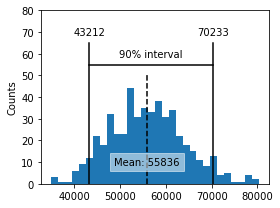

In [11]:
confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

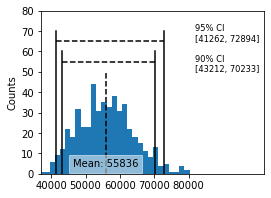

In [12]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

# 4. Normal Distribution

Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science. You will encounter it at many places especially in topics of statistical inference. It is one of the assumptions of many data science algorithms too.

A normal distribution has a bell-shaped density curve described by its mean μ and standard deviation σ. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean.

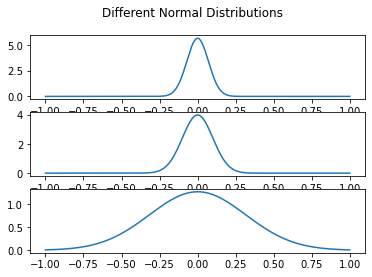

In [13]:
x = np.linspace(0 - 10*0.1, 0 + 10*0.1, 10000)
fig, axs = plt.subplots(3)
fig.suptitle('Different Normal Distributions')
axs[0].plot(x, stats.norm.pdf(x, 0, math.sqrt(0.005)),label='mu=0, variance=0.05')
axs[1].plot(x, stats.norm.pdf(x, 0, math.sqrt(0.01)),label='mu=0, variance=0.01')
axs[2].plot(x, stats.norm.pdf(x, 0, math.sqrt(0.1)),label='mu=0, variance=0.1')





# 5. Bernoulli Distribution

A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial, for example, a coin toss. So the random variable X which has a Bernoulli distribution can take value 1 with the probability of success, p, and the value 0 with the probability of failure, q or 1−p. 

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


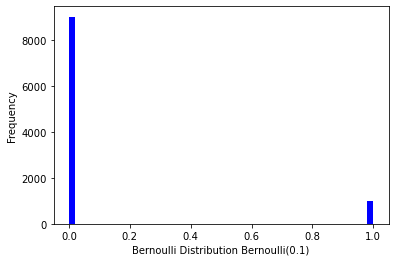

In [14]:
data_bern_01 = stats.bernoulli.rvs(size=10000,p=0.1)
ax = sns.distplot(data_bern_01,
                  bins=50,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution Bernoulli(0.1)', ylabel='Frequency');

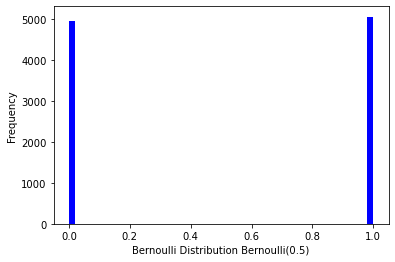

In [15]:
data_bern_05 = stats.bernoulli.rvs(size=10000,p=0.5)
ax = sns.distplot(data_bern_05,
                  bins=50,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution Bernoulli(0.5)', ylabel='Frequency');

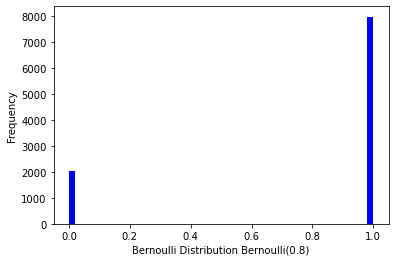

In [16]:
data_bern_08 = stats.bernoulli.rvs(size=10000,p=0.8)
ax = sns.distplot(data_bern_08,
                  bins=50,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution Bernoulli(0.8)', ylabel='Frequency');

# 6. Binomial Distribution

The Binomial Distribution represents the number of successes and failures in n independent Bernoulli trials for some given value of n. For instance the number of heads obtained in tossing a coin 30 times.

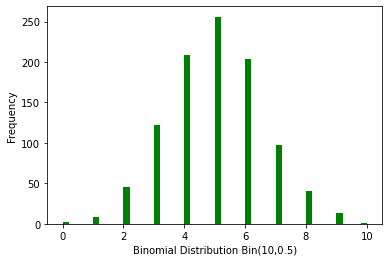

In [17]:
data_binom_10_05 = stats.binom.rvs(n=10,p=0.5,size=1000)
ax = sns.distplot(data_binom_10_05,
                  bins=50,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution Bin(10,0.5)', ylabel='Frequency');

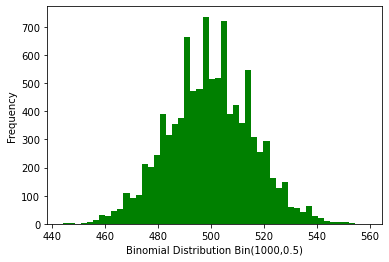

In [18]:
data_binom_1000_05 = stats.binom.rvs(n=1000,p=0.5,size=10000)
ax = sns.distplot(data_binom_1000_05,
                  bins=50,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution Bin(1000,0.5)', ylabel='Frequency');

As you can see, the higher the number of trials n, the more the shape of our Binomial random variable recalls the well-known bell-shaped curve of Gaussian distribution.


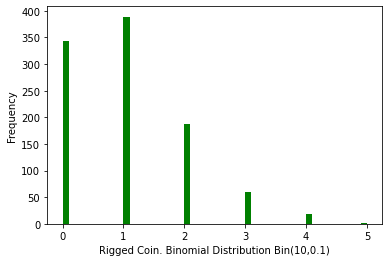

In [19]:
data_binom_10_01 = stats.binom.rvs(n=10,p=0.1,size=1000)
ax = sns.distplot(data_binom_10_01,
                  bins=50,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Rigged Coin. Binomial Distribution Bin(10,0.1)', ylabel='Frequency');

# 7. Poisson Distribution

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate (μ) at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated λ (lambda). Lambda is the event rate, also called the rate parameter.

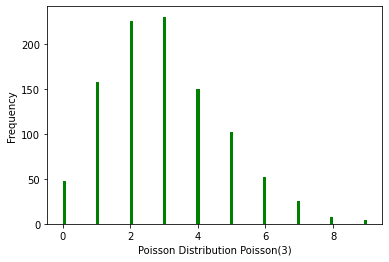

In [20]:
data_poisson_3 = stats.poisson.rvs(mu=3,size=1000)
ax = sns.distplot(data_poisson_3,
                  bins=100,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution Poisson(3)', ylabel='Frequency');

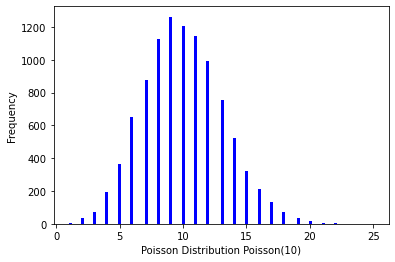

In [21]:
data_poisson_10 = stats.poisson.rvs(mu=10,size=10000)
ax = sns.distplot(data_poisson_10,
                  bins=100,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution Poisson(10)', ylabel='Frequency');

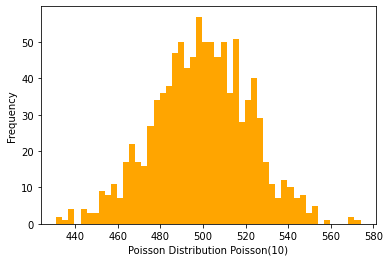

In [22]:
data_poisson_500 = stats.poisson.rvs(mu=500,size=1000)
ax = sns.distplot(data_poisson_500,
                  bins=50,
                  kde=False,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution Poisson(10)', ylabel='Frequency');

# 8. Exponential Distribution

The exponential distribution describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. It has a parameter λ called rate parameter

Using the same parameter λ that we used in the Poisson distribution, we can also model the distribution of the time between events: time between visits to a website or between cars arriving at a toll plaza. It is also used in engineering to model time to failure, and in process management to model, for example, the time required per service call. 

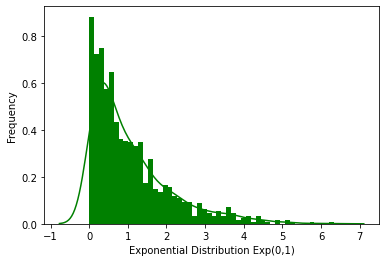

In [23]:
data_expon_1 = stats.expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data_expon_1,
                  bins=50,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution Exp(0,1)', ylabel='Frequency');




/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


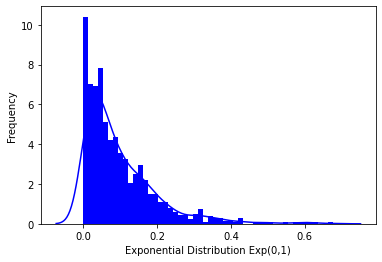

In [24]:
data_expon_01 = stats.expon.rvs(scale=0.1,loc=0,size=1000)
ax = sns.distplot(data_expon_01,
                  bins=50,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution Exp(0,1)', ylabel='Frequency');

# 9. Weibull Distribution

In many cases, the event rate does not remain constant over time. If the period over which it changes is much longer than the typical interval between events, there is no problem; you just subdivide the analysis into the segments where rates are relatively constant, as mentioned before. If, however, the event rate changes over the time of the interval, the exponential (or Poisson) distributions are no longer useful. This is likely to be the case in mechanical failure—the risk of failure increases as time goes by. The Weibull distribution is an extension of the exponential distribution in which the event rate is allowed to change, as specified by a shape parameter, β. If β > 1, the probability of an event increases over time; if β < 1, the probability decreases. Because the Weibull distribution is used with time-to-failure analysis instead of event rate, the second parameter is expressed in terms of characteristic life, rather than in terms of the rate of events per interval. The symbol used is η, the Greek letter eta. It is also called the scale parameter.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


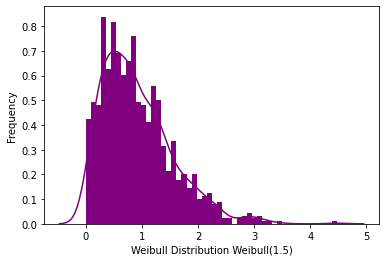

In [25]:
data_weibull_15_5000 = stats.weibull_min.rvs(c=1.5,size=1000)
ax = sns.distplot(data_weibull_15_5000,
                  bins=50,
                  kde=True,
                  color='purple',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Weibull Distribution Weibull(1.5)', ylabel='Frequency');

# 10. Q-Q Plots

The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. 

Here’s an example of a Normal Q-Q plot when both sets of quantiles truly come from Normal distributions.

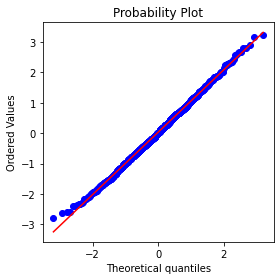

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=1000)
stats.probplot(norm_sample,dist=stats.norm, plot=ax)

plt.tight_layout()
plt.show()

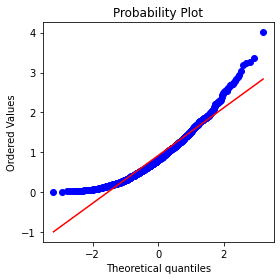

In [27]:
fig, ax = plt.subplots(figsize=(4, 4))

weibull_sample = stats.weibull_min.rvs(c=1.5,size=1000)
stats.probplot(weibull_sample,dist=stats.norm, plot=ax)

plt.tight_layout()
plt.show()